## Plotting vectors: atmospheric model output from PacIOOS
In this example we will try to make a vector plot of winds around Guam from the PacIOOS operational forecast model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from mpl_toolkits.basemap import Basemap, shiftgrid
from netCDF4 import Dataset
%matplotlib inline

In [5]:
# Unlike the larger models, PacIOOS uses THREDDS to aggregate output, so we don't 
#   need to get a specific time by filename, instead we have a constant URL and
#   just access the last time.

url = "https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/wrf_guam/WRF_Guam_Regional_Atmospheric_Model_best.ncd"
data = Dataset(url)
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
u = data.variables['Uwind'][-1][:][:]
v = data.variables['Vwind'][-1][:][:]
p = data.variables['Pair'][-1][:][:]

Text(0.5, 1.0, 'SLP and Wind Vectors ')

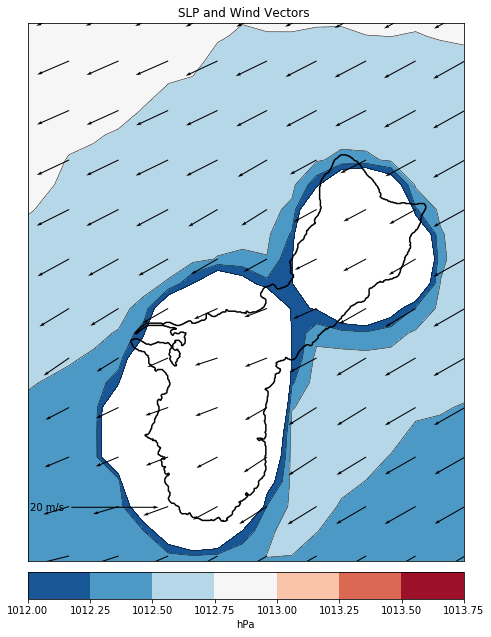

In [32]:
# make 2-d grid of lons, lats
lons, lats = np.meshgrid(lon,lat)

# make orthographic basemap.
m = Basemap(projection='merc',llcrnrlat=13.2,urcrnrlat=13.8,\
            llcrnrlon=144.5,urcrnrlon=145.0,lat_ts=13.5,resolution='f')

# create figure, add axes
fig1 = plt.figure(figsize=(8,10))
ax = fig1.add_axes([0.1,0.1,0.8,0.8])

# set desired contour levels.
clevs = np.arange(1012,1014,0.25)

# compute native x,y coordinates of grid.
x, y = m(lons, lats)

# define parallels and meridians to draw.
parallels = np.arange(12.0,16.0,1.0)
meridians = np.arange(142.0,148.0,2.0)

# plot SLP contours.
CS1 = m.contour(x,y,p,clevs,linewidths=0.5,colors='k')
CS2 = m.contourf(x,y,p,clevs,cmap=plt.cm.RdBu_r)
Q = m.quiver(x[::2,::2],y[::2,::2],u[::2,::2],v[::2,::2],scale=100)

# make quiver key.
qk = plt.quiverkey(Q, 0.1, 0.1, 20, '20 m/s', labelpos='W')

# draw coastlines, parallels, meridians.
m.drawcoastlines(linewidth=1.5)
m.drawparallels(parallels)
m.drawmeridians(meridians)

# add colorbar
cb = m.colorbar(CS2,"bottom", size="5%", pad="2%")
cb.set_label('mb')

# set plot title
ax.set_title('SLP and Wind Vectors ')

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'animated'
  s)


Text(0.5, 1.0, 'SLP and Wind Barbs ')

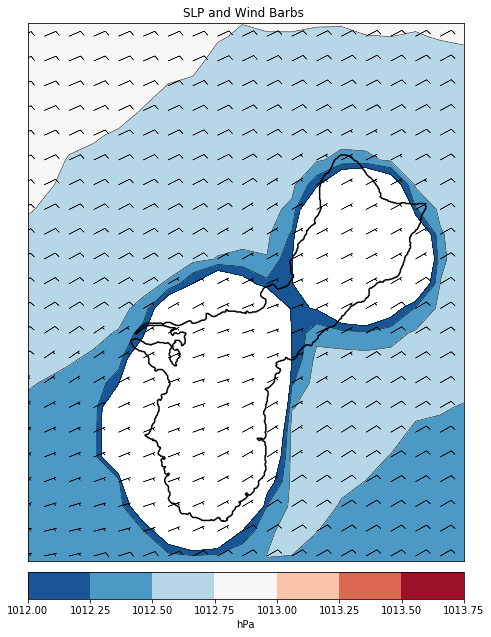

In [33]:
# Let's try the same thing but with wind barbs

fig2 = plt.figure(figsize=(8,10))
ax = fig2.add_axes([0.1,0.1,0.8,0.8])

# plot SLP contours
CS1 = m.contour(x,y,p,clevs,linewidths=0.5,colors='k',animated=True)
CS2 = m.contourf(x,y,p,clevs,cmap=plt.cm.RdBu_r,animated=True)

# plot wind barbs over map.
barbs = m.barbs(x,y,u,v,length=5,barbcolor='k',flagcolor='r',linewidth=0.5)

# draw coastlines, parallels, meridians.
m.drawcoastlines(linewidth=1.5)
m.drawparallels(parallels)
m.drawmeridians(meridians)

# add colorbar
cb = m.colorbar(CS2,"bottom", size="5%", pad="2%")
cb.set_label('hPa')

# set plot title.
ax.set_title('SLP and Wind Barbs ')